## Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import shuffle
import cv2
import os
import tensorflow as tf

In [2]:
df = pd.read_csv('Training_labels.csv')
df

,asset_id,T1_smooth,T1_features_disk,T1_star_artifact,T2_edgeon_yes,T2_edgeon_no,T3_bar,T3_no_bar,T4_spiral,T4_no_spiral,...,T9_bulge_no,T10_arms_tight,T10_arms_medium,T10_arms_loose,T11_arms_1,T11_arms_2,T11_arms_3,T11_arms_4,T11_arms_4+,T11_arms_no
0,3,0.216,0.736,0.000,0.000000,1.000000,0.376434,0.541040,0.751993,3.489199e-02,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000
1,4,0.216,0.736,0.000,0.000000,1.000000,0.376434,0.541040,0.751993,3.489199e-02,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000
2,5,0.773,0.029,0.114,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000e+00,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
3,6,0.152,0.639,0.009,0.000000,1.000000,0.000000,1.000000,0.692553,2.628765e-01,...,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000
4,7,0.152,0.639,0.009,0.000000,1.000000,0.000000,1.000000,0.692553,2.628765e-01,...,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267062,295294,0.000,1.000,0.000,0.000000,1.000000,0.912724,0.049065,1.000000,0.000000e+00,...,0.00000,0.395750,0.516223,0.080662,0.000000,0.068418,0.05868,0.50517,0.419035,0.029496
267063,295295,0.800,0.146,0.073,0.126668,0.836558,0.000000,1.000000,0.993507,2.460000e-27,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000
267064,295296,0.800,0.146,0.073,0.126668,0.836558,0.000000,1.000000,0.993507,2.460000e-27,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000
267065,295304,0.089,0.892,0.010,0.343208,0.668841,0.228637,0.750691,0.982358,6.400000e-06,...,0.58578,0.313458,0.266263,0.361677,0.075168,0.115436,0.00000,0.00000,0.000000,0.692101


In [3]:
df.dtypes

asset_id                 int64
T1_smooth              float64
T1_features_disk       float64
T1_star_artifact       float64
T2_edgeon_yes          float64
T2_edgeon_no           float64
T3_bar                 float64
T3_no_bar              float64
T4_spiral              float64
T4_no_spiral           float64
T5_no_bulge            float64
T5_noticeable_bulge    float64
T5_obvious_bulge       float64
T5_dominant_bulge      float64
T6_odd_yes             float64
T6_odd_no              float64
T7_round               float64
T7_inbetween           float64
T7_cigar               float64
T8_odd_ring            float64
T8_odd_lens_arc        float64
T8_odd_disturbed       float64
T8_odd_irregular       float64
T8_odd_other           float64
T8_odd_merger          float64
T8_odd_dustlane        float64
T9_bulge_round         float64
T9_bulge_boxy          float64
T9_bulge_no            float64
T10_arms_tight         float64
T10_arms_medium        float64
T10_arms_loose         float64
T11_arms

In [4]:
df.isnull().any()

asset_id               False
T1_smooth              False
T1_features_disk       False
T1_star_artifact       False
T2_edgeon_yes          False
T2_edgeon_no            True
T3_bar                 False
T3_no_bar               True
T4_spiral              False
T4_no_spiral            True
T5_no_bulge            False
T5_noticeable_bulge    False
T5_obvious_bulge       False
T5_dominant_bulge       True
T6_odd_yes              True
T6_odd_no              False
T7_round                True
T7_inbetween           False
T7_cigar               False
T8_odd_ring            False
T8_odd_lens_arc        False
T8_odd_disturbed       False
T8_odd_irregular       False
T8_odd_other           False
T8_odd_merger          False
T8_odd_dustlane         True
T9_bulge_round          True
T9_bulge_boxy           True
T9_bulge_no            False
T10_arms_tight         False
T10_arms_medium        False
T10_arms_loose         False
T11_arms_1              True
T11_arms_2              True
T11_arms_3    

In [5]:
df = df.dropna()

In [6]:
#Chaning the id to a path to remove rows more easily
df['asset_id_path'] = 'C:/python_lessons/January_Project/images/' + df['asset_id'].astype(str) + '.jpg'
df

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_23168\3318997013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['asset_id_path'] = 'C:/python_lessons/January_Project/images/' + df['asset_id'].astype(str) + '.jpg'


,asset_id,T1_smooth,T1_features_disk,T1_star_artifact,T2_edgeon_yes,T2_edgeon_no,T3_bar,T3_no_bar,T4_spiral,T4_no_spiral,...,T10_arms_tight,T10_arms_medium,T10_arms_loose,T11_arms_1,T11_arms_2,T11_arms_3,T11_arms_4,T11_arms_4+,T11_arms_no,asset_id_path
0,3,0.216,0.736,0.000,0.000000,1.000000,0.376434,0.541040,0.751993,3.489199e-02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,C:/python_lessons/January_Project/images/3.jpg
1,4,0.216,0.736,0.000,0.000000,1.000000,0.376434,0.541040,0.751993,3.489199e-02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,C:/python_lessons/January_Project/images/4.jpg
2,5,0.773,0.029,0.114,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,C:/python_lessons/January_Project/images/5.jpg
3,6,0.152,0.639,0.009,0.000000,1.000000,0.000000,1.000000,0.692553,2.628765e-01,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,C:/python_lessons/January_Project/images/6.jpg
4,7,0.152,0.639,0.009,0.000000,1.000000,0.000000,1.000000,0.692553,2.628765e-01,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,C:/python_lessons/January_Project/images/7.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267062,295294,0.000,1.000,0.000,0.000000,1.000000,0.912724,0.049065,1.000000,0.000000e+00,...,0.395750,0.516223,0.080662,0.000000,0.068418,0.05868,0.50517,0.419035,0.029496,C:/python_lessons/January_Project/images/29529...
267063,295295,0.800,0.146,0.073,0.126668,0.836558,0.000000,1.000000,0.993507,2.460000e-27,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,C:/python_lessons/January_Project/images/29529...
267064,295296,0.800,0.146,0.073,0.126668,0.836558,0.000000,1.000000,0.993507,2.460000e-27,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,C:/python_lessons/January_Project/images/29529...
267065,295304,0.089,0.892,0.010,0.343208,0.668841,0.228637,0.750691,0.982358,6.400000e-06,...,0.313458,0.266263,0.361677,0.075168,0.115436,0.00000,0.00000,0.000000,0.692101,C:/python_lessons/January_Project/images/29530...


In [1]:
#Removing all the rows which do not have a corresponding image
        
#for index, sample in df.iterrows():
    #if not os.path.isfile(sample['asset_id_path']):
        #df = df.drop(index)
        
        #if index % 100 == 0:
            #print(index)

In [14]:
#df.to_csv('Traininglabels_cleaned.csv', index=False)

In [4]:
df = pd.read_csv('Traininglabels_cleaned.csv')
df['asset_id_path'] = df['asset_id'].astype(str) + '.jpg'
df.head() 

,asset_id,T1_smooth,T1_features_disk,T1_star_artifact,T2_edgeon_yes,T2_edgeon_no,T3_bar,T3_no_bar,T4_spiral,T4_no_spiral,...,T10_arms_tight,T10_arms_medium,T10_arms_loose,T11_arms_1,T11_arms_2,T11_arms_3,T11_arms_4,T11_arms_4+,T11_arms_no,asset_id_path
0,3,0.216,0.736,0.000,0.0,1.0,0.376434,0.54104,0.751993,0.034892,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.jpg
1,4,0.216,0.736,0.000,0.0,1.0,0.376434,0.54104,0.751993,0.034892,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.jpg
2,5,0.773,0.029,0.114,0.0,1.0,0.000000,1.00000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.jpg
3,6,0.152,0.639,0.009,0.0,1.0,0.000000,1.00000,0.692553,0.262876,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.jpg
4,7,0.152,0.639,0.009,0.0,1.0,0.000000,1.00000,0.692553,0.262876,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.jpg


In [7]:
list_files = df["asset_id_path"].values.tolist()
#Putting the filenames into a list

In [2]:
#There are more files in the directory than there is informantion about them, so deleting all the files which are not in the dataframe

#data_path = "C:/python_lessons/January_Project/images/"

#for filename in os.listdir(data_path):
    #print(filename)
    #if filename not in list_files:
        #os.remove(os.path.join(data_path,filename))
    

## Model Building in Keras

In [3]:
#import splitfolders

#input_folder = 'C:/python_lessons/January_Project/1cat/'

#splitfolders.ratio(input_folder, output='split_images100',seed=42, ratio=(0.25,0.05,0.70), group_prefix=None)

In [7]:
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.optimizers import SGD, RMSprop, Adam
from torchvision import transforms
import torchvision
import torch

import matplotlib.pylab as plt
%matplotlib inline

In [3]:
datapath = 'C:/python_lessons/January_Project/split_images100/'

In [4]:
class data_getter:    
    """
    Creates a class for handling train/valid/test data paths,
    training labels and image IDs.
    Useful for switching between sample and full datasets.
    """
    def __init__(self, path):    
        self.path = path 
        self.train_path = path + 'train/images'
        self.test_path = path + 'val/images'
        
        def get_paths(directory):
            return [f for f in os.listdir(directory)]
        
        self.training_images_paths = get_paths(self.train_path)
        self.testing_images_paths = get_paths(self.test_path)    
        
        def get_all_solutions():
        ### Import solutions file and load into self.solutions
            import csv
            all_solutions = {}
            with open('C:/python_lessons/January_Project/Traininglabels_cleaned.csv', 'r') as f:
                reader = csv.reader(f, delimiter=",")
                next(reader)
                for i, line in enumerate(reader):
                    all_solutions[line[0]] = [float(x) for x in line[1:4]]
            return all_solutions
        
        self.all_solutions = get_all_solutions()

    def get_id(self,fname):
        return fname.replace(".jpg","").replace('data','')
        
        
    def find_label(self,val):
        try:
            return self.all_solutions[val]
        except KeyError: #If there is no data of that particular image
            pass
        

fetcher = data_getter(datapath)
print(fetcher.train_path)

C:/python_lessons/January_Project/split_images100/train/images


In [5]:
def process_images(paths):
    """
    Import image at 'paths', decode, centre crop and prepare for batching. 
    """
    undersampling = transforms.Resize(106)
    count = len(paths)
    arr = np.zeros(shape=(count,3,106,106))
    for c, path in enumerate(paths):
        img = plt.imread(path).T
        img = img.astype('float')
        img = img[:,106:106*3,106:106*3] #crop 424x424 -> 212x212
        img = torch.from_numpy(img)
        img = undersampling(img) #interpolation=cv2.INTER_CUBIC) # downsample to half res
        img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(img)
        arr[c] = img
    return arr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


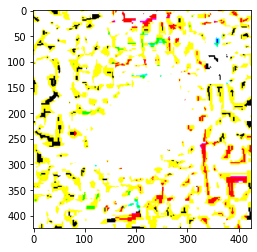

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_24148\3768173621.py:11: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3281.)
  torch_tensor_im = torch_tensor_im.T[:,106:106*3,106:106*3] #crop 424x424 -> 212x212
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 212, 212])
torch.Size([3, 106, 106])


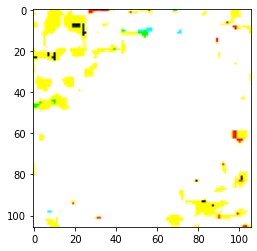

In [8]:
# Print an image before and after preprocessing

im = plt.imread(fetcher.train_path + '/' + fetcher.training_images_paths[100])

im = im.astype('float')
torch_tensor_im = torch.from_numpy(im)
transform = transforms.Resize(106)

plt.imshow(torch_tensor_im)
plt.show()
torch_tensor_im = torch_tensor_im.T[:,106:106*3,106:106*3] #crop 424x424 -> 212x212
print(torch_tensor_im.shape)
torch_tensor_im = transform(torch_tensor_im) #downsample
torch_tensor_im = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(torch_tensor_im)
plt.imshow(torch_tensor_im.T)
print(torch_tensor_im.shape)

In [9]:
X_train= []
y_train= []

for f in fetcher.training_images_paths:
    X_train_pics = process_images([fetcher.train_path + '/' + fname for fname in [f]])
    id_ = fetcher.get_id(f)
    y_train_values = np.array(fetcher.find_label(id_))
    y_train_values = np.resize(y_train_values,(3))
    X_train.append(X_train_pics)
    y_train.append(y_train_values)

In [10]:
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)

In [11]:
type(X_train)

numpy.ndarray

In [12]:
print(X_train.shape)
print(y_train.shape)

(60067, 1, 3, 106, 106)
(60067, 3)


In [14]:
X_train = X_train.reshape(60067,106,106,3)

In [15]:
X_train.shape

(60067, 106, 106, 3)

In [16]:
def ConvBlock(layers, model, filters):
    """
    Create a layered Conv/Pooling block
    """
    for i in range(layers): 
        model.add(ZeroPadding2D((1,1)))  # zero padding of size 1
        model.add(Convolution2D(filters, 3, 3, activation='relu'))  # 3x3 filter size 
    model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))

def FCBlock(model):
    """
    Fully connected block with ReLU and dropout
    """
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    
def VGG_16():
    """
    Implement VGG16 architecture
    """
    model = Sequential()
    model.add(Lambda(lambda x : x, input_shape=(106,106,3), output_shape=(106,106,3)))
    
    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)

    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    
    model.add(Dense(3, activation = 'sigmoid'))
    return model

# Compile 
optimizer = RMSprop(learning_rate=1e-4,)#, clipvalue=1)
model = VGG_16()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy',tf.keras.metrics.RootMeanSquaredError()])

In [17]:
tf_history = model.fit(X_train, y_train,epochs=15,validation_split=0.15,batch_size=600,verbose=1)

Epoch 1/15
86/86 [==============================] - 1595s 18s/step - loss: 0.0934 - accuracy: 0.5858 - root_mean_squared_error: 0.3056 - val_loss: 0.0836 - val_accuracy: 0.5636 - val_root_mean_squared_error: 0.2892
Epoch 2/15
86/86 [==============================] - 1595s 19s/step - loss: 0.0828 - accuracy: 0.5878 - root_mean_squared_error: 0.2878 - val_loss: 0.0817 - val_accuracy: 0.6541 - val_root_mean_squared_error: 0.2859
Epoch 3/15
86/86 [==============================] - 1594s 19s/step - loss: 0.0798 - accuracy: 0.6424 - root_mean_squared_error: 0.2825 - val_loss: 0.0785 - val_accuracy: 0.6350 - val_root_mean_squared_error: 0.2802
Epoch 4/15
86/86 [==============================] - 1594s 19s/step - loss: 0.0777 - accuracy: 0.6585 - root_mean_squared_error: 0.2787 - val_loss: 0.0782 - val_accuracy: 0.6168 - val_root_mean_squared_error: 0.2797
Epoch 5/15
86/86 [==============================] - 1591s 19s/step - loss: 0.0767 - accuracy: 0.6635 - root_mean_squared_error: 0.2769 - val

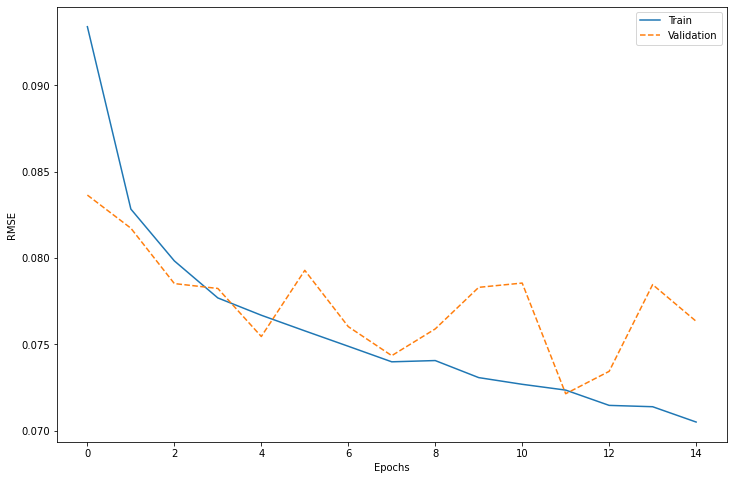

In [19]:
plt.figure(figsize=(12,8))
plt.plot(tf_history.epoch,tf_history.history['loss'],label='Train')
plt.plot(tf_history.epoch,tf_history.history['val_loss'],label='Validation',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [20]:
import pickle 

saving_model = 'finalised_model.sav'
pickle.dump(model, open(saving_model, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_10
......vars
.........0
.........1
...layers\conv2d_11
......vars
.........0
.........1
...layers\conv2d_12
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\conv2d_4
......vars
.........0
.........1
...layers\conv2d_5
......vars
.........0
.........1
...layers\conv2d_6
......vars
.........0
.........1
...layers\conv2d_7
......vars
.........0
.........1
...layers\conv2d_8
......vars
.........0
.........1
...layers\conv2d_9
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\lambda


## Predicting

In [ ]:
# Load best model weights
#from keras.models import load_model
#model = load_model('tmp/weights.hdf5')

In [21]:
X_testing= []
y_testing= []

for f in fetcher.testing_images_paths:
    X_test_pics = process_images([fetcher.test_path + '/' + fname for fname in [f]])
    id_ = fetcher.get_id(f)
    y_test_values = np.array(fetcher.find_label(id_))
    y_test_values = np.resize(y_test_values,(3))
    X_testing.append(X_test_pics)
    y_testing.append(y_test_values)

In [22]:
X_testing = np.array(X_testing).astype(np.float32)
y_testing = np.array(y_testing).astype(np.float32)

In [23]:
print(y_testing.shape)
print(X_testing.shape)

(12013, 3)
(12013, 1, 3, 106, 106)


In [24]:
X_testing=X_testing.reshape(12013,106,106,3)

In [25]:
predictions = model.predict(X_testing)

376/376 [==============================] - 26s 65ms/step


In [26]:
from sklearn.metrics import mean_squared_error
print('RMSE = ', np.sqrt(mean_squared_error(y_testing, predictions)))

RMSE =  0.27459997


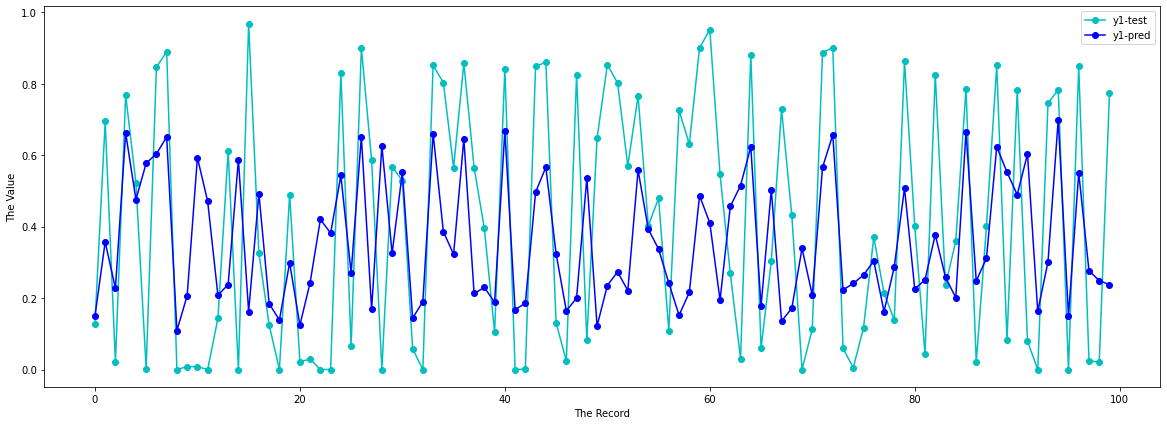

In [41]:
plt.figure(figsize=(20,7))


x_ax = range(len(X_testing[:100]))
plt.plot(x_ax, y_testing[:100,0], label="y1-test", color='c', marker='o')
plt.plot(x_ax, predictions[:100,0], label="y1-pred", color='b', marker='o')
#plt.plot(x_ax, y_testing[:100,1], label="y2-test", color='m')
#plt.plot(x_ax, predictions[:100,1], label="y2-pred", color='r')
#plt.plot(x_ax, y_testing[:100,2], label="y3-test", color='m')
#plt.plot(x_ax, predictions[:100,2], label="y3-pred", color='r')
plt.xlabel('The Record')
plt.ylabel('The Value')
plt.legend()
plt.show()

In [56]:
#files_=test_generator.filenames
#results=pd.DataFrame({"Predictions":predictions.tolist(),"True_values":y_testing.tolist()})
#results
#results.to_csv("results_80%.csv",index=False)

,Predictions,True_values
0,"[0.7584406733512878, 0.19941730797290802, 0.03...","[0.34299999475479126, 0.5389999747276306, 0.05..."
1,"[0.370310515165329, 0.6068045496940613, 0.0248...","[0.5, 0.6140000224113464, 0.0010000000474974513]"
2,"[0.14197103679180145, 0.8470073938369751, 0.00...","[0.023000000044703484, 0.9739999771118164, 0.0]"
3,"[0.2952916622161865, 0.6863579750061035, 0.016...","[0.8460000157356262, 0.3779999911785126, 0.0]"
4,"[0.21545793116092682, 0.7701448202133179, 0.00...","[0.024000000208616257, 0.9639999866485596, 0.0..."
...,...,...
9732,"[0.27114489674568176, 0.7117834687232971, 0.01...","[0.23999999463558197, 0.859000027179718, 0.028..."
9733,"[0.1712183952331543, 0.816370964050293, 0.0012...","[0.10400000214576721, 0.9509999752044678, 0.02..."
9734,"[0.6261817216873169, 0.34251174330711365, 0.03...","[0.6000000238418579, 0.210999995470047, 0.0]"
9735,"[0.13472551107406616, 0.8545970320701599, 0.00...","[0.16500000655651093, 0.8420000076293945, 0.03..."


In [57]:
#results.to_csv("results_80%.csv",index=False)